<div align="center">

# <span style="color: #3498db;">CA3 - Machine Learning</span>

**<span style="color:rgb(247, 169, 0);">Ali Sadeghi Maharluee</span> - <span style="color:rgb(143, 95, 195);">810102471</span>**

</div>

In [79]:
import sys

assert sys.version_info >= (3, 7)

In [80]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

## Get the Data

In [81]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import matplotlib.pyplot as plt


grading = pd.read_csv("Grades.csv")

## Make a Quick look at the data structure

In [82]:
grading.head()

,university,sex,age,address,motherEducation,fatherEducation,motherJob,fatherJob,reason,travelTime,...,internet,romantic,freeTime,goOut,Dalc,Walc,absences,EPSGrade,DSGrade,finalGrade
0,PR,F,18,U,4,4,at_home,teacher,course,2,...,no,no,3,4,1,1,6,5,6,6
1,PR,F,17,U,1,1,at_home,other,course,1,...,yes,no,3,3,1,1,4,5,5,6
2,PR,F,15,U,1,1,at_home,other,other,1,...,yes,no,3,2,2,3,10,7,8,10
3,PR,F,15,U,4,2,health,services,home,1,...,yes,yes,2,2,1,1,2,15,14,15
4,PR,F,16,U,3,3,other,other,home,1,...,no,no,3,2,1,2,4,6,10,10


In [83]:
grading.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   university         397 non-null    object
 1   sex                397 non-null    object
 2   age                397 non-null    int64 
 3   address            397 non-null    object
 4   motherEducation    397 non-null    int64 
 5   fatherEducation    397 non-null    int64 
 6   motherJob          397 non-null    object
 7   fatherJob          397 non-null    object
 8   reason             397 non-null    object
 9   travelTime         397 non-null    int64 
 10  studyTime          397 non-null    int64 
 11  failures           397 non-null    int64 
 12  universitySupport  397 non-null    object
 13  paid               397 non-null    object
 14  higher             397 non-null    object
 15  internet           397 non-null    object
 16  romantic           397 non-null    object
 1

From the info we realize that there is no null value in our dataset. so no need to handle the null values. But we see there are some values with the type of object and they should be number or binary encoded numbers. so we can see a better result in our model.

In [84]:
grading.describe()

,age,motherEducation,fatherEducation,travelTime,studyTime,failures,freeTime,goOut,Dalc,Walc,absences,EPSGrade,DSGrade,finalGrade
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,16.705290,2.748111,2.521411,1.450882,2.032746,0.335013,3.234257,3.108312,1.478589,2.289673,5.695214,10.881612,10.687657,10.377834
std,1.279716,1.097301,1.090672,0.696840,0.838731,0.742714,0.996476,1.112762,0.889143,1.286770,7.988015,3.333120,3.770322,4.604928
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,1.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,3.000000,3.000000,1.000000,2.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,4.000000,4.000000,2.000000,3.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [85]:
IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

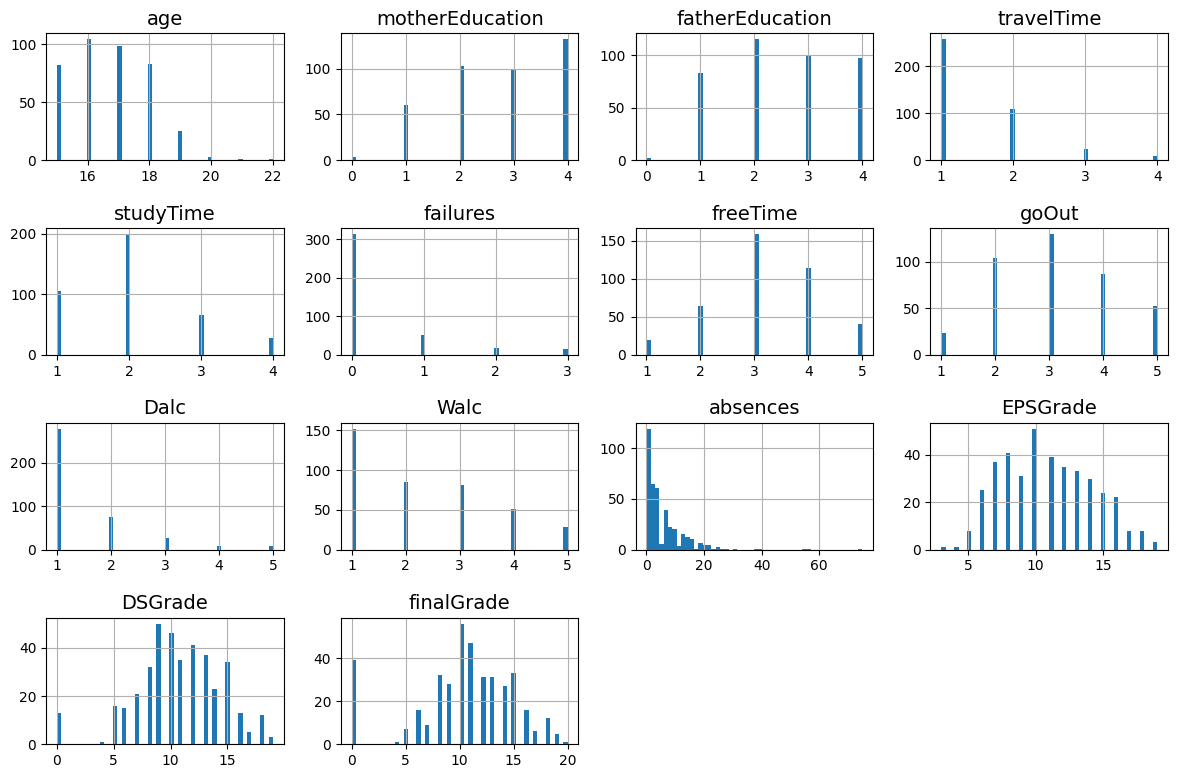

In [86]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


grading.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")
plt.show()

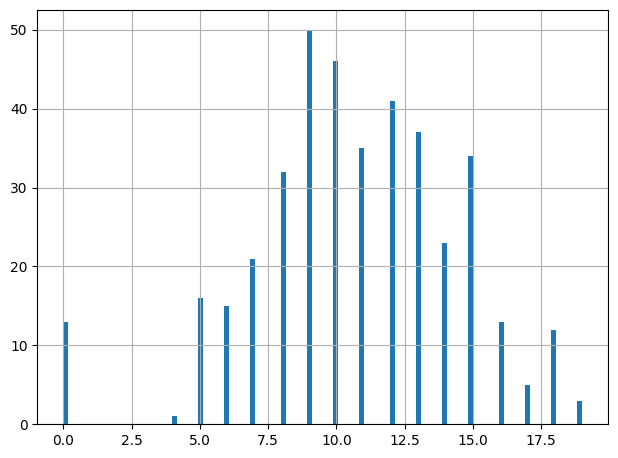

In [87]:
grading["DSGrade"].hist(bins=100)
save_fig("DSGrade_histogram")
plt.show()

In [88]:
grading["DSGrade"].between(0,5, inclusive="left").sum()

np.int64(14)

### just looking for a little correlation

In [89]:
corr_matrix = grading.corr(numeric_only=True)

In [90]:
corr_matrix["DSGrade"].sort_values(ascending=False)

,DSGrade
DSGrade,1.000000
finalGrade,0.905238
EPSGrade,0.853474
motherEducation,0.215932
fatherEducation,0.164364
studyTime,0.139795
freeTime,-0.012066
absences,-0.028994
Dalc,-0.060002
Walc,-0.083323


In [91]:
from sklearn.ensemble import RandomForestRegressor

zero_mask = grading['DSGrade'] == 0
non_zero_data = grading[~zero_mask]
zero_data = grading[zero_mask]

# Train a model to predict missing values
model = RandomForestRegressor()
features = ['EPSGrade','failures']
model.fit(non_zero_data[features], non_zero_data['DSGrade'])

if len(zero_data) > 0:
    grading.loc[zero_mask, 'DSGrade'] = model.predict(zero_data[features]).clip(0, 20)

In [92]:
import numpy as np
def probabilistic_round(x):
    return int(x) + (1 if np.random.rand() < (x - int(x)) else 0)

grading['DSGrade'] = grading['DSGrade'].apply(probabilistic_round).clip(0, 20)

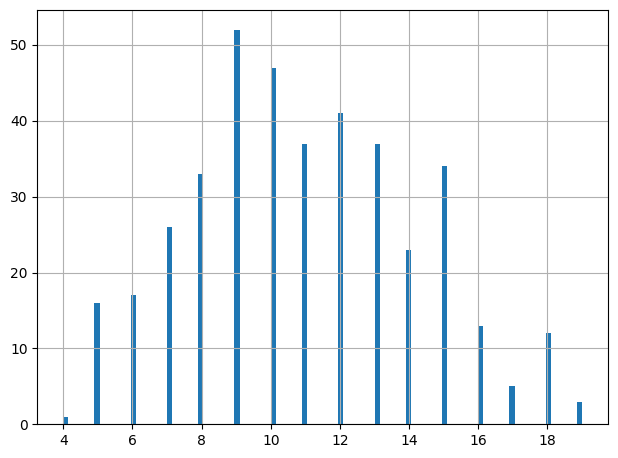

In [93]:
grading["DSGrade"].hist(bins=100)
save_fig("DSGrade_histogram")
plt.show()

In [94]:
grading["DSGrade"].between(0,5, inclusive="left").sum()

np.int64(1)

In [95]:
grading["DSGrade"].between(0,3, inclusive="left").sum()

np.int64(0)

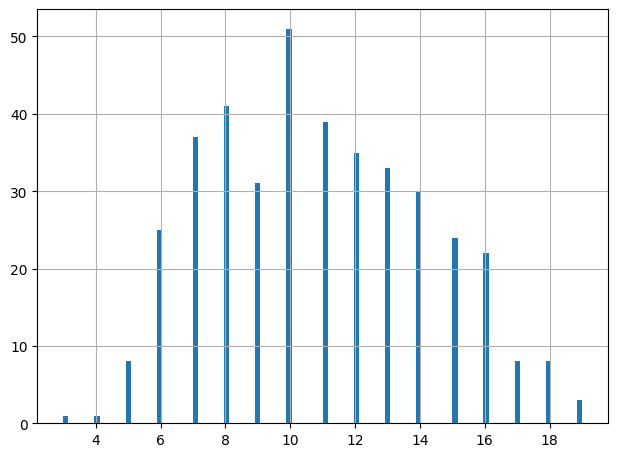

In [96]:
grading["EPSGrade"].hist(bins=100)
save_fig("EPSGrade_histogram")
plt.show()

I think it resembles bell and does not need droping some rows.

### Create a Test Set

We use a quick check of correlation for stratified sampling based on a feature. which feature? I don't know. I will use the feature with the most correlation for stratified sampling.

In [97]:
corr_matrix["finalGrade"].sort_values(ascending=False)

,finalGrade
finalGrade,1.000000
DSGrade,0.905238
EPSGrade,0.802676
motherEducation,0.220783
fatherEducation,0.155256
studyTime,0.104015
absences,0.037944
freeTime,0.013131
Dalc,-0.049826
Walc,-0.052185


It seems thaht the final grade is correlated with the DS grade.

In [98]:
np.random.seed(71)

In [99]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [100]:
print(type(grading))

<class 'pandas.core.frame.DataFrame'>


In [101]:
grading_with_id = grading.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(grading_with_id, 0.2, "index")

In [102]:
grading_with_id.head()

,index,university,sex,age,address,motherEducation,fatherEducation,motherJob,fatherJob,reason,...,internet,romantic,freeTime,goOut,Dalc,Walc,absences,EPSGrade,DSGrade,finalGrade
0,0,PR,F,18,U,4,4,at_home,teacher,course,...,no,no,3,4,1,1,6,5,6,6
1,1,PR,F,17,U,1,1,at_home,other,course,...,yes,no,3,3,1,1,4,5,5,6
2,2,PR,F,15,U,1,1,at_home,other,other,...,yes,no,3,2,2,3,10,7,8,10
3,3,PR,F,15,U,4,2,health,services,home,...,yes,yes,2,2,1,1,2,15,14,15
4,4,PR,F,16,U,3,3,other,other,home,...,no,no,3,2,1,2,4,6,10,10


In [103]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(grading, test_size=0.2, random_state=71)

In [104]:
grading["DSGrade_cat"] = pd.cut(grading["DSGrade"],
                               bins=[0., 10., 14., 17., 20.],
                               labels=[1, 2, 3, 4])

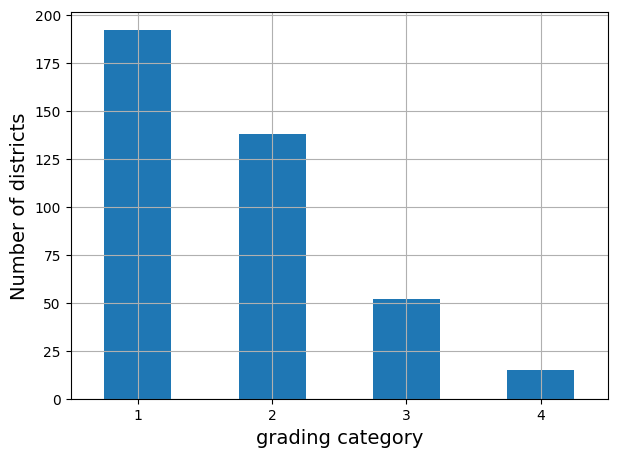

In [105]:
grading["DSGrade_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("grading category")
plt.ylabel("Number of districts")
save_fig("DSGrade_cat_bar_plot")
plt.show()

In [106]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=71)
strat_splits = []
for train_index, test_index in splitter.split(grading, grading["DSGrade_cat"]):
    strat_train_set_n = grading.iloc[train_index]
    strat_test_set_n = grading.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [107]:
strat_train_set, strat_test_set = strat_splits[0]

It's much shorter to get a single stratified split:

If we need just one split and not 10 splits, we can use this method below:

In [108]:
strat_train_set, strat_test_set = train_test_split(
    grading, test_size=0.2, stratify=grading["DSGrade_cat"],shuffle=True, random_state=71)

In [109]:
strat_test_set["DSGrade_cat"].value_counts() / len(strat_test_set)

,count
DSGrade_cat,
1,0.4875
2,0.3500
3,0.1250
4,0.0375


## Discover and Visualize the Data to Gain Insights

first we make a copy from our data

In [110]:
grading = strat_train_set.copy()

Find the correlation between finalGrade and the features:

In [111]:
corr_matrix = grading.corr(numeric_only=True)

In [112]:
corr_matrix["finalGrade"].sort_values(ascending=False)

,finalGrade
finalGrade,1.000000
DSGrade,0.852030
EPSGrade,0.795067
motherEducation,0.224672
fatherEducation,0.156117
studyTime,0.076084
absences,0.039161
freeTime,-0.000015
Dalc,-0.066525
Walc,-0.067707


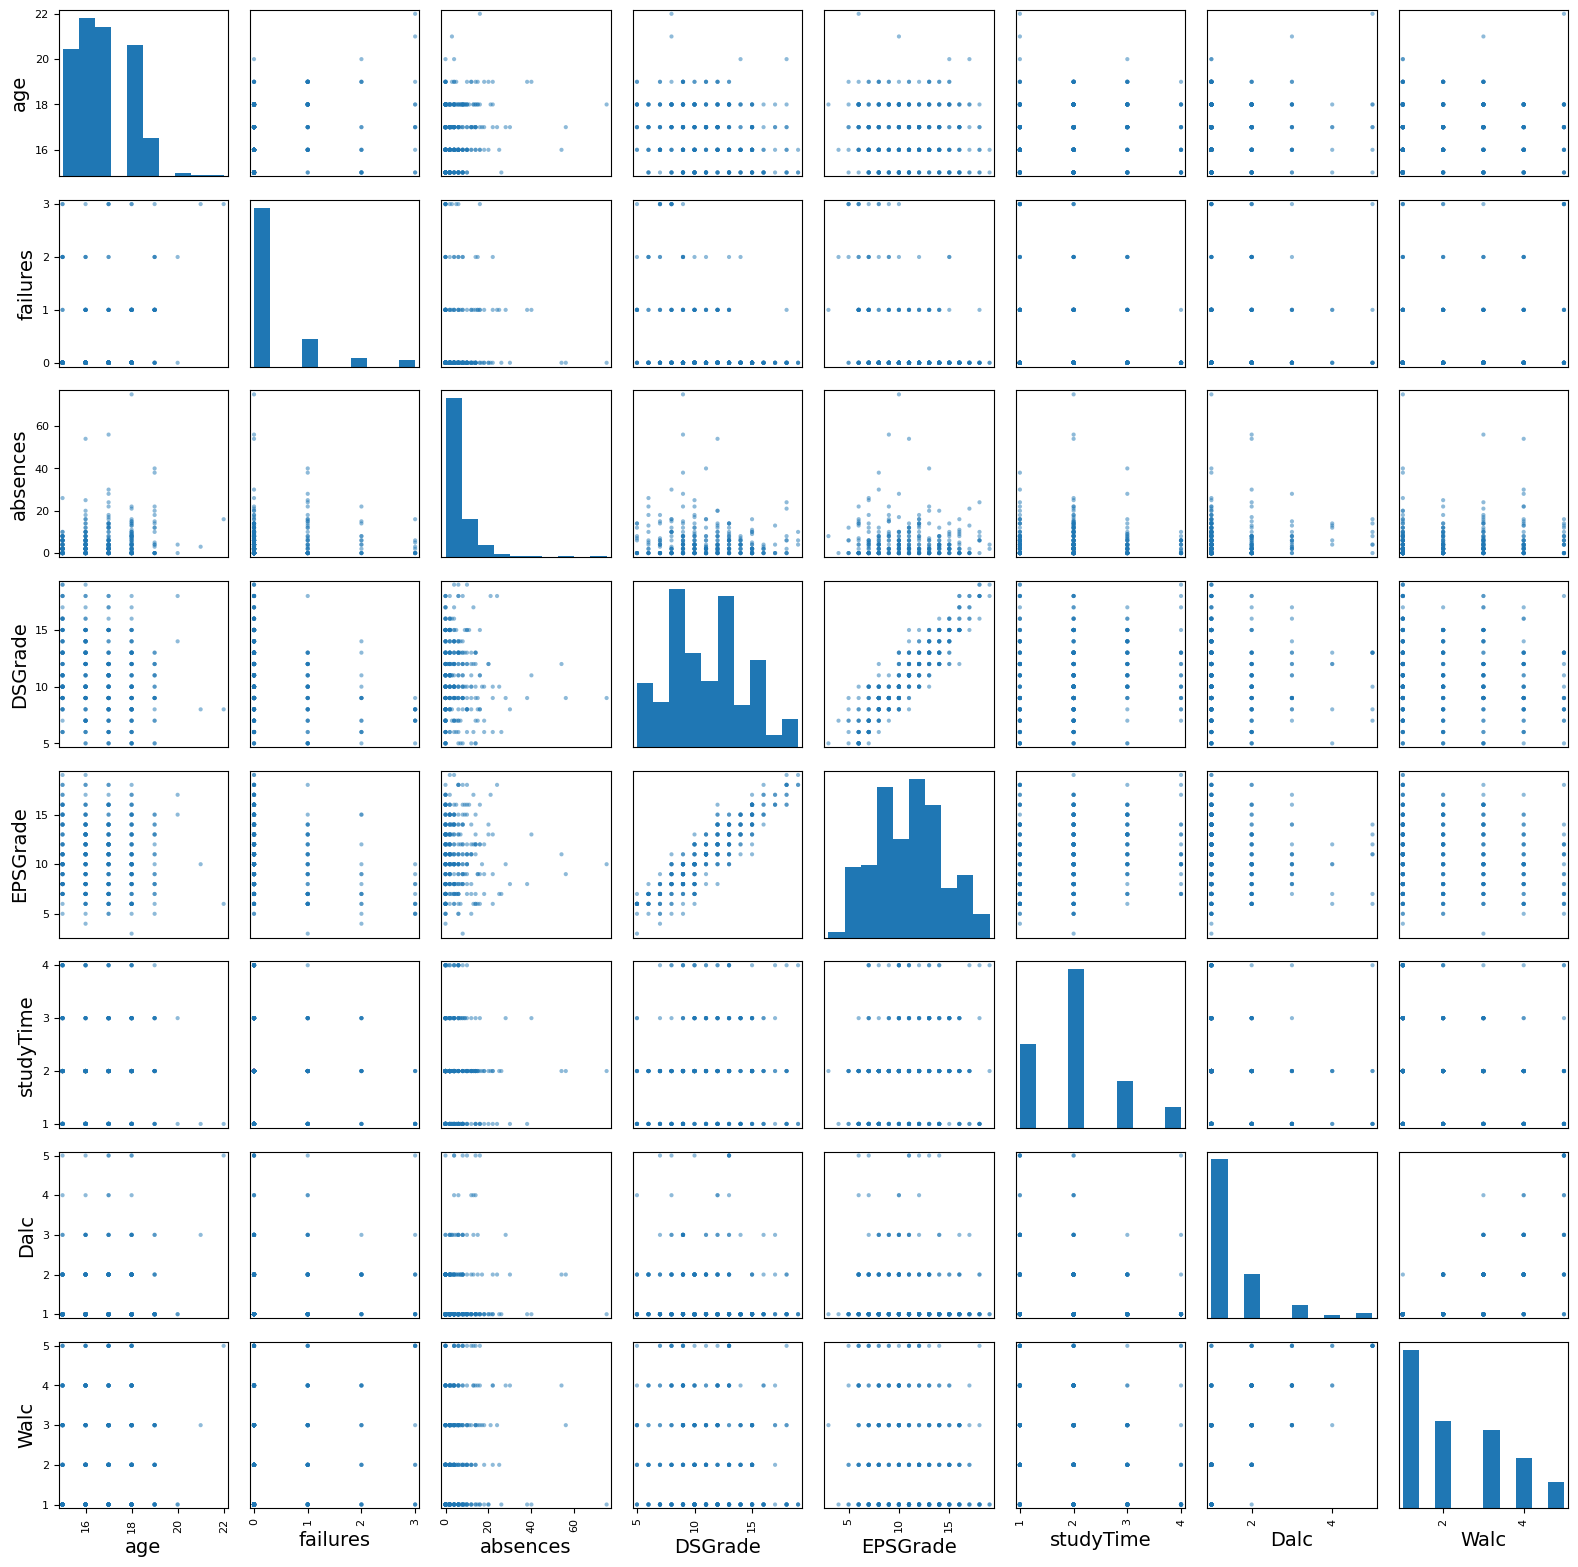

In [113]:
from pandas.plotting import scatter_matrix

attributes = ["age","failures", "absences", "DSGrade", "EPSGrade" , "studyTime", "Dalc", "Walc"]
scatter_matrix(grading[attributes], figsize=(16, 16))
save_fig("scatter_matrix_plot")
plt.show()

There is no good correlation for us. just there is a little correlation for

EPSGrade and DSgrade.

absenses and EPSGrade.

absenses and DSGrade.

failures and absenses.

failures and EPSGrade.

failures and DSGrade.

absenses and Dalc.

We should engineer new features to have a better correlation between the new features and finalGrade:

### Composite Academic Features

In [114]:
#Academic performance index
grading['academic_index'] = (grading['EPSGrade']/20 * 0.6) + ((5 - grading['failures'])/5 * 0.4)

#Study efficiency score
grading['study_efficiency'] = grading['studyTime'] / (grading['goOut'] + grading['freeTime'] + 0.01)

### Family Background Features

In [115]:
#Parental education composite
grading['parent_edu_score'] = (grading['motherEducation'] + grading['fatherEducation'])/2

#Education-job alignment
grading['edu_job_alignment'] = ((grading['motherEducation'] >= 3) & (grading['motherJob'].isin(['teacher','health']))) | ((grading['fatherEducation'] >= 3) & (grading['fatherJob'].isin(['teacher','health'])))

### Lifestyle Features

In [116]:
# Alcohol consumption pattern
grading['alcohol_pattern'] = grading['Walc'] - grading['Dalc']  # Weekend vs weekday difference

# Time management score
conditions = [
    (grading['studyTime'].astype(int) >= 3) & (grading['goOut'].astype(int) <= 2),
    (grading['studyTime'].astype(int) >= 3) & (grading['goOut'].astype(int) > 2),
    (grading['studyTime'].astype(int) < 3) & (grading['goOut'].astype(int) <= 2),
    (grading['studyTime'].astype(int) < 3) & (grading['goOut'].astype(int) > 2)
]

choices = ['balanced', 'social', 'studious', 'distracted']

grading['time_profile'] = np.select(conditions, choices, default='unknown')

### University-Related Features

In [117]:
# Support system composite
grading['support_system'] = grading['universitySupport'].map({'yes':1, 'no':0}) + \
                      grading['paid'].map({'yes':1, 'no':0}) + \
                      grading['higher'].map({'yes':1, 'no':0})

# Travel impact score
grading['travel_impact'] = grading['travelTime'].apply(lambda x: 0 if x == 1 else (0.5 if x == 2 else (1.5 if x == 3 else 2)))

grading["attendance"] = grading["absences"] * grading["failures"]

## Advanced Visualization for Feature Engineering

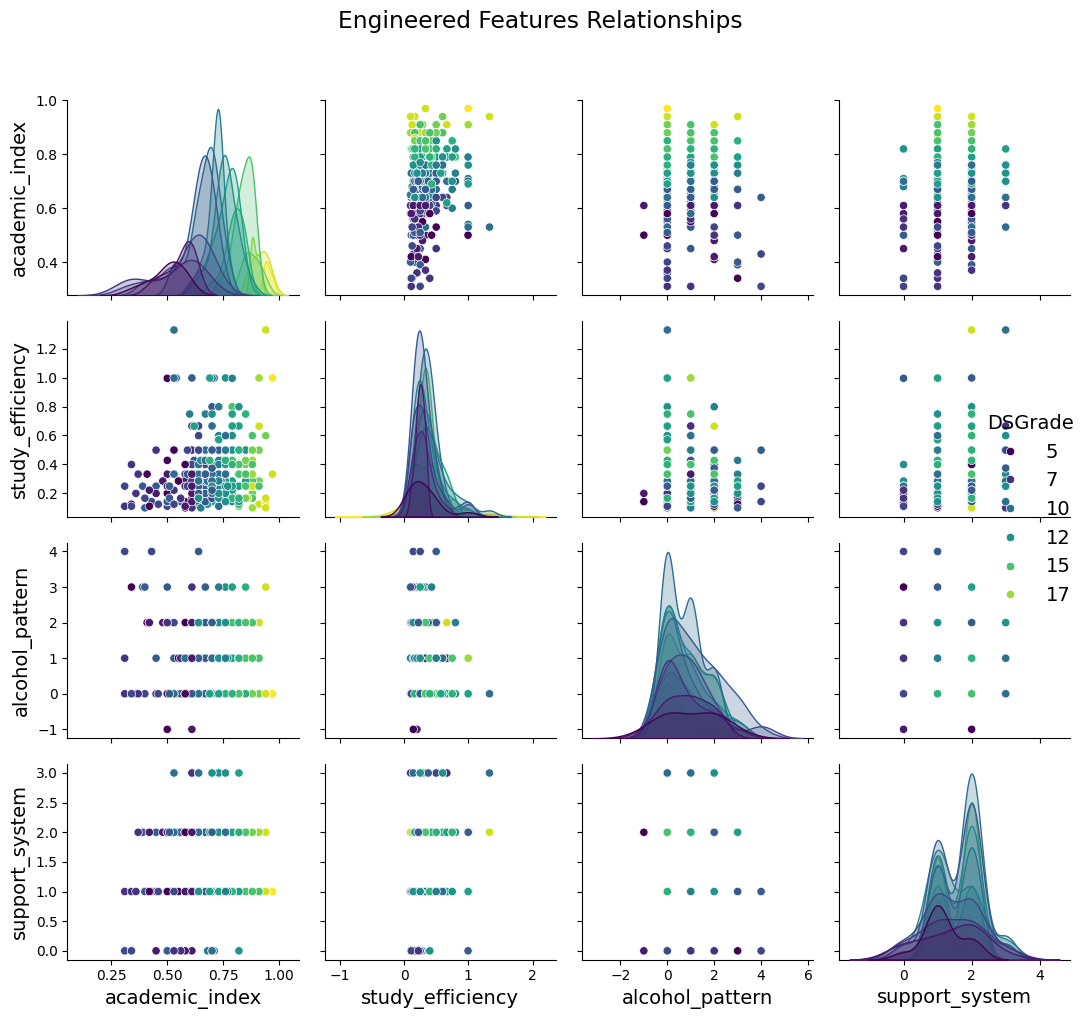

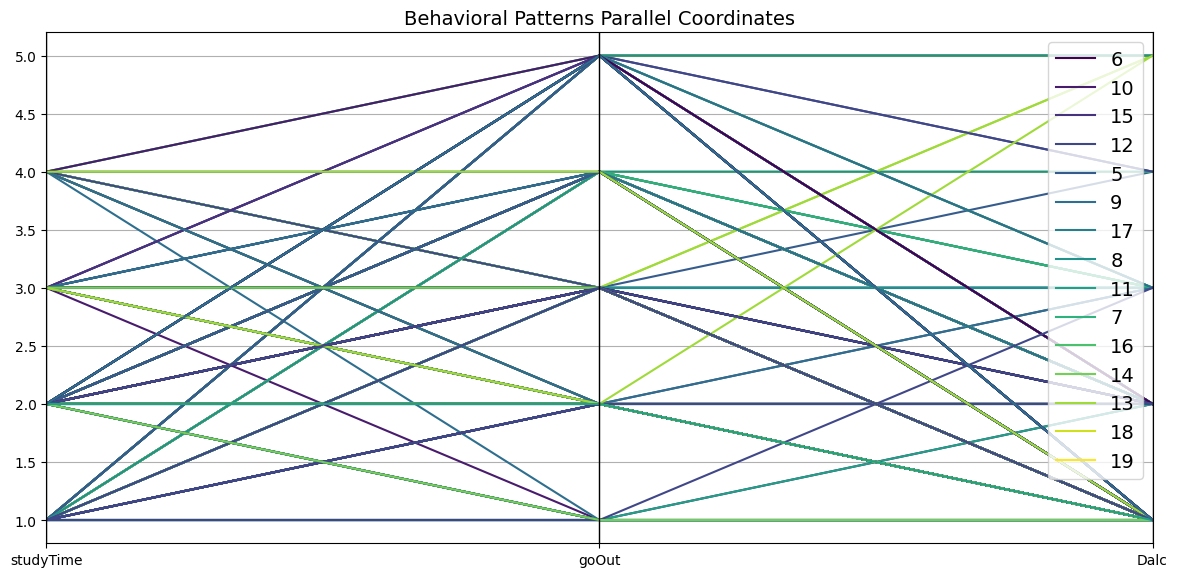

In [118]:
import seaborn as sns

sns.pairplot(grading[['academic_index', 'study_efficiency', 'alcohol_pattern', 'support_system', 'DSGrade']],
             hue='DSGrade', palette='viridis')
plt.suptitle('Engineered Features Relationships', y=1.02)
save_fig("engineered_features_pairplot")


from pandas.plotting import parallel_coordinates
plt.figure(figsize=(12,6))
parallel_coordinates(grading[['studyTime', 'goOut', 'Dalc', 'DSGrade']], 'DSGrade', colormap='viridis')
plt.title('Behavioral Patterns Parallel Coordinates')
save_fig("behavioral_patterns_parallel_coordinates")

In [119]:
corr_matrix = grading.corr(numeric_only=True)

<Axes: xlabel='study_efficiency', ylabel='finalGrade'>

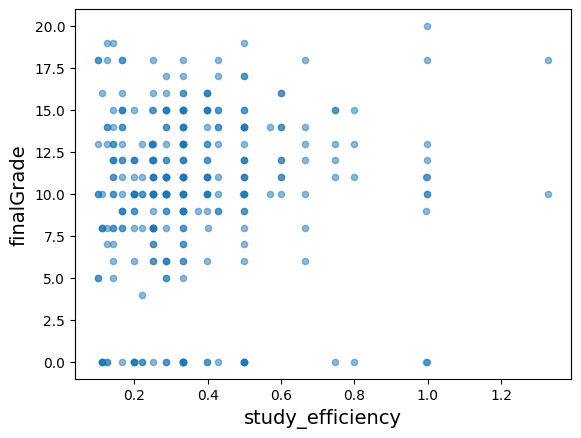

In [120]:
grading.plot.scatter("study_efficiency", "finalGrade", alpha=0.5)

In [121]:
corr_matrix['finalGrade'].sort_values(ascending=False)

,finalGrade
finalGrade,1.000000
DSGrade,0.852030
EPSGrade,0.795067
academic_index,0.759069
motherEducation,0.224672
parent_edu_score,0.210940
edu_job_alignment,0.163224
fatherEducation,0.156117
support_system,0.130992
study_efficiency,0.094704


# Prepare the Data for Machine Learning Algorithms

In [122]:
grading = strat_train_set.drop("finalGrade", axis=1)
grading_labels = strat_train_set["finalGrade"].copy()

### Handling Text and Categorical Attributes

make the lables as grade for our classification model

In [ ]:
bins = [0, 10, 14, 17, 20]
labels = ['D', 'C', 'B', 'A']
grading_labels = pd.cut(strat_train_set["finalGrade"],
                             bins=bins,
                             labels=labels,
                             right=False,
                             include_lowest=True)

In [124]:
grading_cat = grading[["university", "sex", "address", "motherJob", "fatherJob","paid","higher","internet","romantic"]]
grading_cat.head()

,university,sex,address,motherJob,fatherJob,paid,higher,internet,romantic
217,PR,M,U,services,health,yes,yes,yes,no
136,PR,M,R,at_home,other,no,yes,no,no
363,CM,F,U,at_home,at_home,yes,yes,yes,yes
138,PR,M,U,services,other,no,yes,no,yes
84,PR,F,U,other,other,no,yes,yes,no


In [125]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
grading_cat_1hot = cat_encoder.fit_transform(grading_cat)

In [126]:
grading_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2853 stored elements and shape (317, 24)>

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [127]:
grading_cat_1hot.toarray()

array([[0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 1.]])

In [128]:
cat_encoder = OneHotEncoder(sparse_output=False)
grading_cat_1hot = cat_encoder.fit_transform(grading_cat)
grading_cat_1hot

array([[0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 1.]])

In [129]:
cat_encoder.categories_

[array(['CM', 'PR'], dtype=object),
 array(['F', 'M'], dtype=object),
 array(['R', 'U'], dtype=object),
 array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object),
 array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object)]

In [130]:
df_test = pd.DataFrame({
    "university": ["CM", "PR"],
    "sex": ["F", "M"],
    "address": ["U", "R"],
    "motherJob": ['at_home', 'health'],
    "fatherJob": ['other', 'services'],
    "paid": ["yes", "no"],
    "higher": ["yes", "no"],
    "internet": ["yes", "no"],
    "romantic": ["yes", "no"]
})

pd.get_dummies(df_test)

,university_CM,university_PR,sex_F,sex_M,address_R,address_U,motherJob_at_home,motherJob_health,fatherJob_other,fatherJob_services,paid_no,paid_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,True,False,True,False,False,True,True,False,True,False,False,True,False,True,False,True,False,True
1,False,True,False,True,True,False,False,True,False,True,True,False,True,False,True,False,True,False


In [131]:
cat_encoder.transform(df_test)

array([[1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 1., 0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 0., 1., 0., 1., 0., 1., 0.]])

In [132]:
cat_encoder.feature_names_in_

array(['university', 'sex', 'address', 'motherJob', 'fatherJob', 'paid',
       'higher', 'internet', 'romantic'], dtype=object)

In [133]:
cat_encoder.get_feature_names_out()

array(['university_CM', 'university_PR', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'motherJob_at_home', 'motherJob_health',
       'motherJob_other', 'motherJob_services', 'motherJob_teacher',
       'fatherJob_at_home', 'fatherJob_health', 'fatherJob_other',
       'fatherJob_services', 'fatherJob_teacher', 'paid_no', 'paid_yes',
       'higher_no', 'higher_yes', 'internet_no', 'internet_yes',
       'romantic_no', 'romantic_yes'], dtype=object)

## Feature Scaling

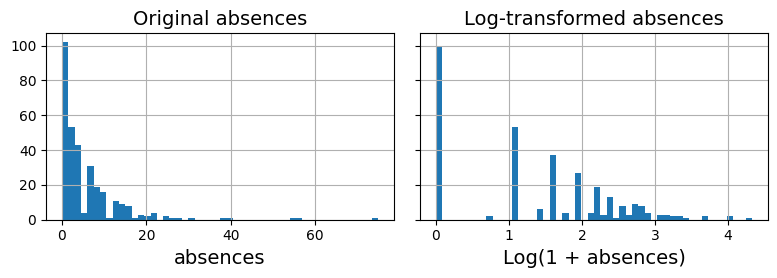

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

grading["absences"].hist(ax=axs[0], bins=50)
axs[0].set_xlabel("absences")
axs[0].set_title("Original absences")

np.log1p(grading["absences"]).hist(ax=axs[1], bins=50)
axs[1].set_xlabel("Log(1 + absences)")
axs[1].set_title("Log-transformed absences")

plt.tight_layout()
plt.show()
save_fig("absences_log_transformation")


In [135]:
df_test.head()

,university,sex,address,motherJob,fatherJob,paid,higher,internet,romantic
0,CM,F,U,at_home,other,yes,yes,yes,yes
1,PR,M,R,health,services,no,no,no,no


In [136]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import warnings
warnings.filterwarnings('ignore')

Create the target variable with proper class labels

In [137]:
def create_grade_categories(grades):
    """Convert numerical grades to categorical labels"""
    bins = [0, 10, 14, 17, 20]
    labels = ['D', 'C', 'B', 'A']
    return pd.cut(grades, bins=bins, labels=labels, right=False, include_lowest=True)

In [138]:
X = strat_train_set.drop("finalGrade", axis=1)
y = create_grade_categories(strat_train_set["finalGrade"])

In [139]:
X_test = strat_test_set.drop("finalGrade", axis=1)
y_test = create_grade_categories(strat_test_set["finalGrade"])

In [140]:
if 'DSGrade_cat' in X.columns:
    X = X.drop('DSGrade_cat', axis=1)
if 'DSGrade_cat' in X_test.columns:
    X_test = X_test.drop('DSGrade_cat', axis=1)

Identify categorical columns (object/string type)

In [141]:
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical features:", categorical_features)

Categorical features: ['university', 'sex', 'address', 'motherJob', 'fatherJob', 'reason', 'universitySupport', 'paid', 'higher', 'internet', 'romantic']


Identify numerical columns

In [142]:
numerical_features = X.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).columns.tolist()
print("Numerical features:", numerical_features)

Numerical features: ['age', 'motherEducation', 'fatherEducation', 'travelTime', 'studyTime', 'failures', 'freeTime', 'goOut', 'Dalc', 'Walc', 'absences', 'EPSGrade', 'DSGrade']


Create preprocessing pipelines

In [143]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

 Combine preprocessing steps

In [144]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'  # Drop any columns not specified
)

Define models

In [145]:
models = {
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=71),
    'Random Forest': RandomForestClassifier(random_state=71),
    'XGBoost': XGBClassifier(random_state=71, eval_metric='mlogloss')
}

Define hyperparameter grids

In [146]:
param_grids = {
    'Naive Bayes': {
        # Naive Bayes doesn't have the hyperparameters mentioned, so we'll use default
    },
    'Decision Tree': {
        'classifier__max_depth': [5, 10, 15, 20, None],
        'classifier__min_samples_split': [2, 5, 10, 20],
        'classifier__min_samples_leaf': [1, 2, 4, 8],
        'classifier__max_features': ['sqrt', 'log2', None]
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [5, 10, 15, None],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__max_features': ['sqrt', 'log2', None]
    },
    'XGBoost': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 7],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__min_child_weight': [1, 3, 5]
    }
}

Function to evaluate model performance

In [147]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    """Evaluate model performance with comprehensive metrics"""

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(
        y_test, y_pred, average='macro', zero_division=0)
    precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(
        y_test, y_pred, average='micro', zero_division=0)
    precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(
        y_test, y_pred, average='weighted', zero_division=0)

    cm = confusion_matrix(y_test, y_pred)

    results = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision_Macro': precision_macro,
        'Recall_Macro': recall_macro,
        'F1_Macro': f1_macro,
        'Precision_Micro': precision_micro,
        'Recall_Micro': recall_micro,
        'F1_Micro': f1_micro,
        'Precision_Weighted': precision_weighted,
        'Recall_Weighted': recall_weighted,
        'F1_Weighted': f1_weighted,
        'Confusion_Matrix': cm
    }

    return results, y_pred

 Function to plot confusion matrix

In [148]:
def plot_confusion_matrix(cm, model_name, classes=['D', 'C', 'B', 'A']):
    """Plot confusion matrix"""
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    save_fig(f"confusion_matrix_{model_name.replace(' ', '_')}")
    plt.show()

Train and evaluate all models

In [149]:
results_list = []
best_models = {}

Training and evaluating models...

Training Naive Bayes...

Naive Bayes Results:
Accuracy: 0.3875
Precision (Macro): 0.3981
Recall (Macro): 0.3782
F1-Score (Macro): 0.3242


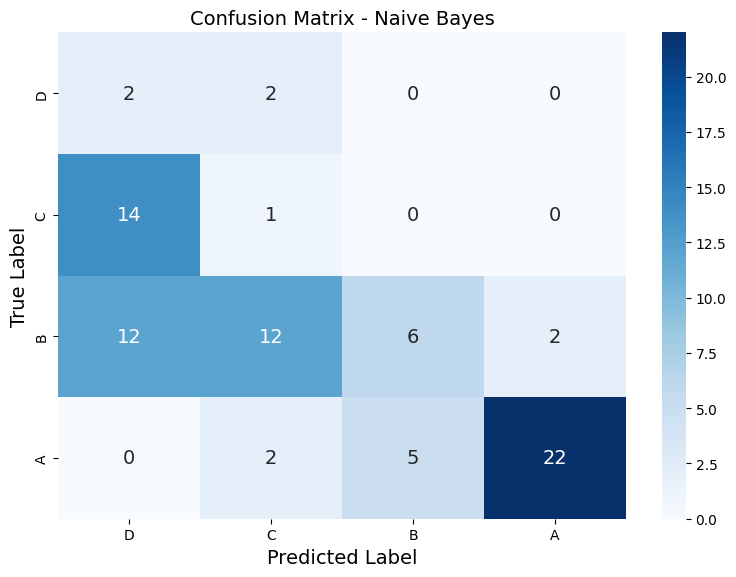


Detailed Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           D       0.07      0.50      0.12         4
           C       0.06      0.07      0.06        15
           B       0.55      0.19      0.28        32
           A       0.92      0.76      0.83        29

    accuracy                           0.39        80
   macro avg       0.40      0.38      0.32        80
weighted avg       0.57      0.39      0.43        80


Training Decision Tree...
Performing hyperparameter tuning for Decision Tree...
Best parameters for Decision Tree: {'classifier__max_depth': 5, 'classifier__max_features': None, 'classifier__min_samples_leaf': 8, 'classifier__min_samples_split': 2}
Best cross-validation score: 0.8450

Decision Tree Results:
Accuracy: 0.8250
Precision (Macro): 0.8731
Recall (Macro): 0.8214
F1-Score (Macro): 0.8416


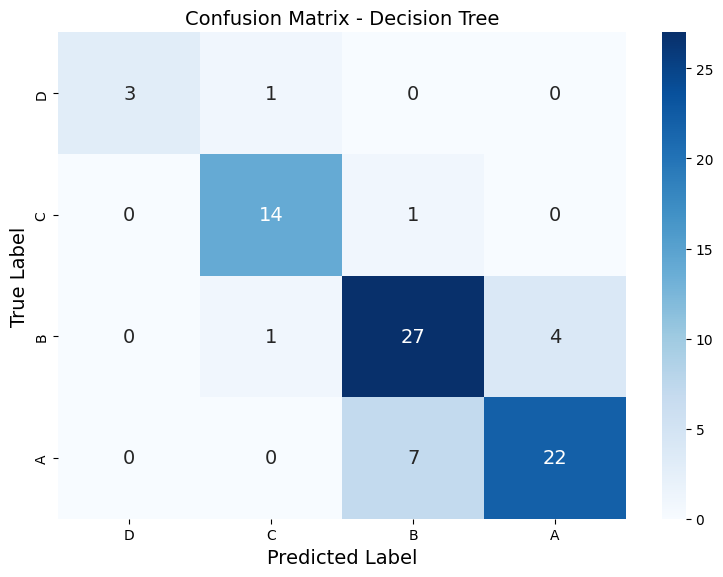


Detailed Classification Report for Decision Tree:
              precision    recall  f1-score   support

           D       1.00      0.75      0.86         4
           C       0.88      0.93      0.90        15
           B       0.77      0.84      0.81        32
           A       0.85      0.76      0.80        29

    accuracy                           0.82        80
   macro avg       0.87      0.82      0.84        80
weighted avg       0.83      0.82      0.82        80


Training Random Forest...
Performing hyperparameter tuning for Random Forest...
Best parameters for Random Forest: {'classifier__max_depth': 5, 'classifier__max_features': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best cross-validation score: 0.8544

Random Forest Results:
Accuracy: 0.8375
Precision (Macro): 0.8795
Recall (Macro): 0.8220
F1-Score (Macro): 0.8460


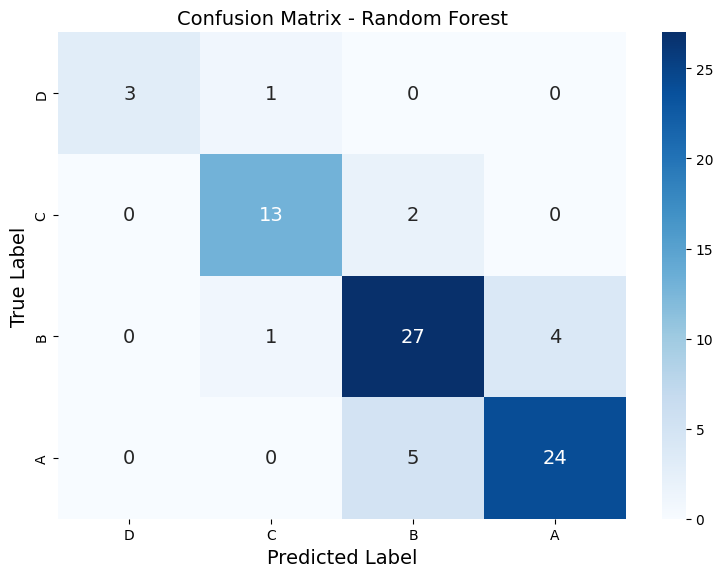


Detailed Classification Report for Random Forest:
              precision    recall  f1-score   support

           D       1.00      0.75      0.86         4
           C       0.87      0.87      0.87        15
           B       0.79      0.84      0.82        32
           A       0.86      0.83      0.84        29

    accuracy                           0.84        80
   macro avg       0.88      0.82      0.85        80
weighted avg       0.84      0.84      0.84        80


Training XGBoost...
Performing hyperparameter tuning for XGBoost...
Best parameters for XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 50}
Best cross-validation score: 0.8417

XGBoost Results:
Accuracy: 0.8125
Precision (Macro): 0.7730
Recall (Macro): 0.7895
F1-Score (Macro): 0.7781


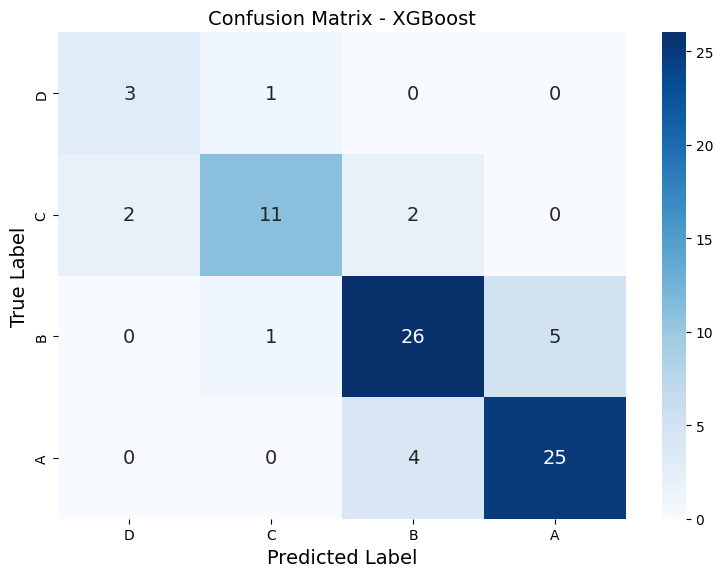


Detailed Classification Report for XGBoost:
              precision    recall  f1-score   support

           D       0.60      0.75      0.67         4
           C       0.85      0.73      0.79        15
           B       0.81      0.81      0.81        32
           A       0.83      0.86      0.85        29

    accuracy                           0.81        80
   macro avg       0.77      0.79      0.78        80
weighted avg       0.82      0.81      0.81        80



In [150]:
print("Training and evaluating models...")
print("=" * 50)

nan_mask = y.isnull()
X = X[~nan_mask]
y = y[~nan_mask]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_test_encoded = le.transform(y_test)

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    if model_name in param_grids and param_grids[model_name]:
        print(f"Performing hyperparameter tuning for {model_name}...")

        if model_name == 'Random Forest':
            reduced_grid = {
                'classifier__n_estimators': [50, 100],
                'classifier__max_depth': [5, 10, None],
                'classifier__min_samples_split': [2, 5],
                'classifier__max_features': ['sqrt', None]
            }
        elif model_name == 'XGBoost':
            reduced_grid = {
                'classifier__n_estimators': [50, 100],
                'classifier__max_depth': [3, 5],
                'classifier__learning_rate': [0.1, 0.2]
            }
        else:
            reduced_grid = param_grids[model_name]

        grid_search = GridSearchCV(
            pipeline, reduced_grid, cv=3, scoring='accuracy',
            n_jobs=-1, verbose=0
        )

        if model_name == 'XGBoost':
            grid_search.fit(X, y_encoded)
        else:
            grid_search.fit(X, y)

        best_model = grid_search.best_estimator_
        best_models[model_name] = best_model

        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
        print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

    else:
        pipeline.fit(X, y)
        best_model = pipeline
        best_models[model_name] = best_model


    if model_name == 'XGBoost':
        results, y_pred_encoded = evaluate_model(best_model, X, y_encoded, X_test, y_test_encoded, model_name)
        y_pred = le.inverse_transform(y_pred_encoded)
    else:
        results, y_pred = evaluate_model(best_model, X, y, X_test, y_test, model_name)


    results_list.append(results)

    print(f"\n{model_name} Results:")
    print(f"Accuracy: {results['Accuracy']:.4f}")
    print(f"Precision (Macro): {results['Precision_Macro']:.4f}")
    print(f"Recall (Macro): {results['Recall_Macro']:.4f}")
    print(f"F1-Score (Macro): {results['F1_Macro']:.4f}")

    plot_confusion_matrix(results['Confusion_Matrix'], model_name)

    print(f"\nDetailed Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred, target_names=['D', 'C', 'B', 'A']))

In [155]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

class DecisionTreeFromScratch:
    """
    Decision Tree Classifier implemented from scratch using entropy-based splitting
    """

    def __init__(self, max_depth=10, min_samples_split=2, min_samples_leaf=1):
        """
        Initialize the Decision Tree

        Parameters:
        -----------
        max_depth : int
            Maximum depth of the tree (default=10)
        min_samples_split : int
            Minimum number of samples required to split a node (default=2)
        min_samples_leaf : int
            Minimum number of samples required at a leaf node (default=1)
        """
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.tree = None
        self.feature_names = None

    def _entropy(self, y):
        """
        Calculate entropy of a set of labels

        Parameters:
        -----------
        y : array-like
            Target labels

        Returns:
        --------
        float : entropy value
        """
        if len(y) == 0:
            return 0

        class_counts = Counter(y)
        total_samples = len(y)

        entropy = 0
        for count in class_counts.values():
            if count > 0:
                probability = count / total_samples
                entropy -= probability * np.log2(probability)

        return entropy

    def _information_gain(self, X_column, y, threshold):
        """
        Calculate information gain for a given feature and threshold

        Parameters:
        -----------
        X_column : array-like
            Feature column values
        y : array-like
            Target labels
        threshold : float
            Threshold value for splitting

        Returns:
        --------
        float : information gain
        """
        parent_entropy = self._entropy(y)

        left_mask = X_column <= threshold
        right_mask = ~left_mask

        total_samples = len(y)
        left_samples = np.sum(left_mask)
        right_samples = np.sum(right_mask)

        if left_samples == 0 or right_samples == 0:
            return 0

        left_entropy = self._entropy(y[left_mask])
        right_entropy = self._entropy(y[right_mask])

        weighted_entropy = (left_samples / total_samples) * left_entropy + \
                          (right_samples / total_samples) * right_entropy

        return parent_entropy - weighted_entropy

    def _find_best_split(self, X, y):
        """
        Find the best feature and threshold for splitting

        Parameters:
        -----------
        X : array-like
            Feature matrix
        y : array-like
            Target labels

        Returns:
        --------
        tuple : (best_feature_idx, best_threshold, best_gain)
        """
        best_gain = -1
        best_feature_idx = None
        best_threshold = None

        n_features = X.shape[1]

        for feature_idx in range(n_features):
            feature_values = X[:, feature_idx]

            # different thresholds
            unique_values = np.unique(feature_values)

            for i in range(len(unique_values) - 1):
                threshold = (unique_values[i] + unique_values[i + 1]) / 2

                gain = self._information_gain(feature_values, y, threshold)

                if gain > best_gain:
                    best_gain = gain
                    best_feature_idx = feature_idx
                    best_threshold = threshold

        return best_feature_idx, best_threshold, best_gain

    def _majority_vote(self, y):
        """
        Return the majority class in the given labels

        Parameters:
        -----------
        y : array-like
            Target labels

        Returns:
        --------
        Most common class label
        """
        if len(y) == 0:
            return None

        class_counts = Counter(y)
        return class_counts.most_common(1)[0][0]

    def _build_tree(self, X, y, depth=0):
        """
        Recursively build the decision tree

        Parameters:
        -----------
        X : array-like
            Feature matrix
        y : array-like
            Target labels
        depth : int
            Current depth of the tree

        Returns:
        --------
        dict : tree node
        """
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        if (depth >= self.max_depth or
            n_samples < self.min_samples_split or
            n_classes == 1 or
            n_samples < 2 * self.min_samples_leaf):

            leaf_value = self._majority_vote(y)
            return {'type': 'leaf', 'value': leaf_value, 'samples': n_samples}

        best_feature_idx, best_threshold, best_gain = self._find_best_split(X, y)

        if best_gain <= 0:
            leaf_value = self._majority_vote(y)
            return {'type': 'leaf', 'value': leaf_value, 'samples': n_samples}

        left_mask = X[:, best_feature_idx] <= best_threshold
        right_mask = ~left_mask

        if np.sum(left_mask) < self.min_samples_leaf or np.sum(right_mask) < self.min_samples_leaf:
            leaf_value = self._majority_vote(y)
            return {'type': 'leaf', 'value': leaf_value, 'samples': n_samples}

        left_subtree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        return {
            'type': 'internal',
            'feature_idx': best_feature_idx,
            'threshold': best_threshold,
            'left': left_subtree,
            'right': right_subtree,
            'samples': n_samples,
            'gain': best_gain
        }

    def fit(self, X, y):
        """
        Build the decision tree based on training data

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Training feature matrix
        y : array-like, shape (n_samples,)
            Training target labels
        """
        if isinstance(X, pd.DataFrame):
            self.feature_names = X.columns.tolist()
            X = X.values
        else:
            X = np.array(X)

        y = np.array(y)

        self.tree = self._build_tree(X, y)

        return self

    def _predict_single(self, x, tree):
        """
        Predict a single sample by traversing the tree

        Parameters:
        -----------
        x : array-like
            Single sample features
        tree : dict
            Tree node

        Returns:
        --------
        Predicted class label
        """
        if tree['type'] == 'leaf':
            return tree['value']

        feature_value = x[tree['feature_idx']]

        if feature_value <= tree['threshold']:
            return self._predict_single(x, tree['left'])
        else:
            return self._predict_single(x, tree['right'])

    def predict(self, X):
        """
        Make predictions on test data

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Test feature matrix

        Returns:
        --------
        array-like : predicted labels
        """
        if self.tree is None:
            raise ValueError("Tree has not been trained yet. Call fit() first.")

        if isinstance(X, pd.DataFrame):
            X = X.values
        else:
            X = np.array(X)

        predictions = []
        for x in X:
            pred = self._predict_single(x, self.tree)
            predictions.append(pred)

        return np.array(predictions)

    def print_tree(self, tree=None, depth=0, prefix="Root: "):
        """
        Print the tree structure (for debugging)

        Parameters:
        -----------
        tree : dict
            Tree node (default: self.tree)
        depth : int
            Current depth
        prefix : str
            Prefix for printing
        """
        if tree is None:
            tree = self.tree

        if tree is None:
            print("Tree has not been built yet.")
            return

        indent = "  " * depth

        if tree['type'] == 'leaf':
            print(f"{indent}{prefix}Predict: {tree['value']} (samples: {tree['samples']})")
        else:
            feature_name = (self.feature_names[tree['feature_idx']]
                          if self.feature_names else f"Feature_{tree['feature_idx']}")
            print(f"{indent}{prefix}If {feature_name} <= {tree['threshold']:.3f} (samples: {tree['samples']}, gain: {tree['gain']:.3f})")

            self.print_tree(tree['left'], depth + 1, "├─ True: ")
            self.print_tree(tree['right'], depth + 1, "└─ False: ")

Now let's test our implementation and compare with sklearn

In [156]:
def compare_decision_trees(X_train, X_test, y_train, y_test):
    """
    Compare our implementation with sklearn's DecisionTreeClassifier
    """
    print("=" * 80)
    print("DECISION TREE COMPARISON: FROM SCRATCH vs SKLEARN")
    print("=" * 80)

    print("Training Decision Tree from Scratch...")
    dt_scratch = DecisionTreeFromScratch(max_depth=10, min_samples_split=5, min_samples_leaf=2)
    dt_scratch.fit(X_train, y_train)

    print("Training Sklearn Decision Tree...")
    dt_sklearn = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=71)
    dt_sklearn.fit(X_train, y_train)

    y_pred_scratch = dt_scratch.predict(X_test)
    y_pred_sklearn = dt_sklearn.predict(X_test)

    accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
    accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

    print(f"\nRESULTS:")
    print(f"Decision Tree from Scratch - Accuracy: {accuracy_scratch:.4f}")
    print(f"Sklearn Decision Tree - Accuracy: {accuracy_sklearn:.4f}")
    print(f"Difference: {abs(accuracy_scratch - accuracy_sklearn):.4f}")

    print(f"\n--- FROM SCRATCH IMPLEMENTATION ---")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_scratch))

    print(f"\n--- SKLEARN IMPLEMENTATION ---")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_sklearn))

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    cm_scratch = confusion_matrix(y_test, y_pred_scratch)
    sns.heatmap(cm_scratch, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title('Decision Tree from Scratch')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')

    cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)
    sns.heatmap(cm_sklearn, annot=True, fmt='d', cmap='Greens', ax=axes[1])
    axes[1].set_title('Sklearn Decision Tree')
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

    return dt_scratch, dt_sklearn, accuracy_scratch, accuracy_sklearn


function to predict my score at the end of term

In [165]:
def predict_personal_grade(best_model, feature_names):
    """
    Function to input personal information and predict grade
    """
    print("\n" + "=" * 80)
    print("PERSONAL GRADE PREDICTION")
    print("=" * 80)
    print("Please enter your information to predict your AI course grade!")
    print("(Enter values based on the scale used in the dataset)")

    personal_data = {}

    feature_descriptions = {
        'age': 'Your age (15-22)',
        'studyTime': 'Weekly study time (1: <2 hours, 2: 2-5 hours, 3: 5-10 hours, 4: >10 hours)',
        'failures': 'Number of past class failures (0-4)',
        'goOut': 'Going out with friends (1: very low to 5: very high)',
        'Dalc': 'Workday alcohol consumption (1: very low to 5: very high)',
        'Walc': 'Weekend alcohol consumption (1: very low to 5: very high)',
        'health': 'Current health status (1: very bad to 5: very good)',
        'absences': 'Number of school absences (0-93)',
        'EPSGrade': 'Previous period grade (0-20)',
        'DSGrade': 'Second period grade (0-20)',
        'freeTime': 'Free time after school (1: very low to 5: very high)',
        'travelTime': 'Home to school travel time (1: <15 min, 2: 15-30 min, 3: 30-60 min, 4: >60 min)'
    }

    for feature in feature_names:
        if feature in feature_descriptions:
            while True:
                try:
                    value = input(f"Enter {feature} - {feature_descriptions[feature]}: ")
                    personal_data[feature] = float(value)
                    break
                except ValueError:
                    print("Please enter a valid numerical value.")

    personal_df = pd.DataFrame([personal_data])

    for feature in feature_names:
        if feature not in personal_df.columns:
            personal_df[feature] = 0

    personal_df = personal_df[feature_names]

    prediction = best_model.predict(personal_df)

    grade_mapping = {'A': '17-20 (Excellent)', 'B': '14-17 (Good)',
                    'C': '10-14 (Satisfactory)', 'D': '0-10 (Needs Improvement)'}

    print(f"Based on your information, your predicted AI course grade is: {prediction[0]}")
    print(f"Grade range: {grade_mapping.get(prediction[0], 'Unknown')}")

    return prediction[0]

In [166]:
print("\n" + "=" * 80)
print("IMPLEMENTING DECISION TREE FROM SCRATCH")
print("=" * 80)

best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
best_model = best_models[best_model_name]
print(f"Best performing model was: {best_model_name}")


IMPLEMENTING DECISION TREE FROM SCRATCH
Best performing model was: Random Forest


Process the data using the same preprocessing pipeline

In [167]:
X_train_processed = best_model.named_steps['preprocessor'].fit_transform(X)
X_test_processed = best_model.named_steps['preprocessor'].transform(X_test)

try:

    num_feature_names = numerical_features

    cat_feature_names = list(best_model.named_steps['preprocessor']
                            .named_transformers_['cat']
                            .named_steps['onehot']
                            .get_feature_names_out(categorical_features))

    all_feature_names = num_feature_names + cat_feature_names

except:
    all_feature_names = [f"feature_{i}" for i in range(X_train_processed.shape[1])]

print(f"Total features after preprocessing: {len(all_feature_names)}")
print(f"Shape of processed training data: {X_train_processed.shape}")
print(f"Shape of processed test data: {X_test_processed.shape}")

Total features after preprocessing: 43
Shape of processed training data: (316, 43)
Shape of processed test data: (80, 43)


run the comparison

DECISION TREE COMPARISON: FROM SCRATCH vs SKLEARN
Training Decision Tree from Scratch...
Training Sklearn Decision Tree...

RESULTS:
Decision Tree from Scratch - Accuracy: 0.7250
Sklearn Decision Tree - Accuracy: 0.6750
Difference: 0.0500

--- FROM SCRATCH IMPLEMENTATION ---
Classification Report:
              precision    recall  f1-score   support

           A       0.43      0.75      0.55         4
           B       0.77      0.67      0.71        15
           C       0.70      0.81      0.75        32
           D       0.83      0.66      0.73        29

    accuracy                           0.72        80
   macro avg       0.68      0.72      0.69        80
weighted avg       0.75      0.72      0.73        80


--- SKLEARN IMPLEMENTATION ---
Classification Report:
              precision    recall  f1-score   support

           A       0.43      0.75      0.55         4
           B       0.75      0.60      0.67        15
           C       0.63      0.81      0.71     

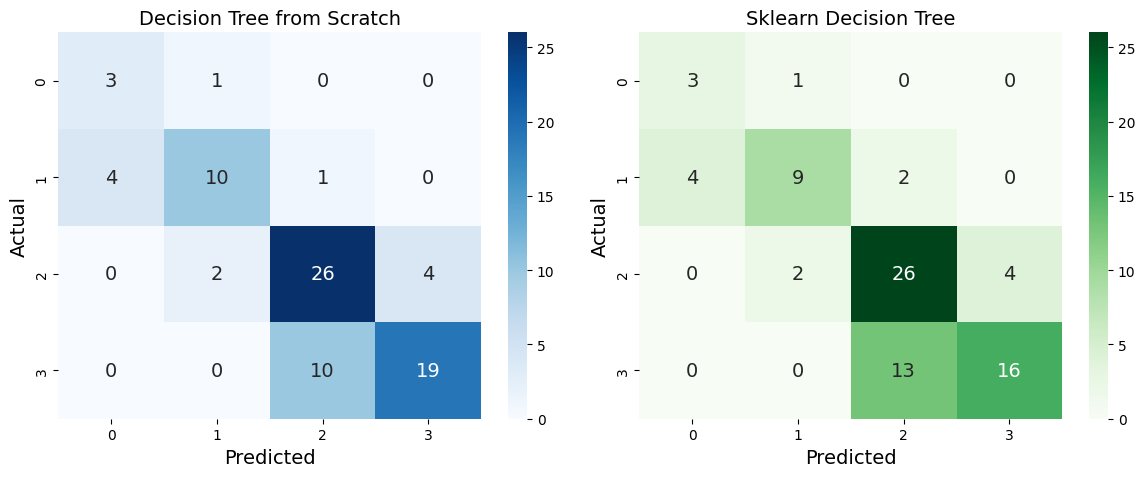


--- DECISION TREE STRUCTURE (First few levels) ---
Root: If Feature_12 <= 0.473 (samples: 316, gain: 0.604)
  ├─ True: If Feature_12 <= -0.457 (samples: 214, gain: 0.451)
    ├─ True: If Feature_11 <= -1.015 (samples: 113, gain: 0.166)
      ├─ True: Predict: D (samples: 51)
      └─ False: If Feature_9 <= 1.759 (samples: 62, gain: 0.118)
        ├─ True: If Feature_10 <= 0.635 (samples: 58, gain: 0.102)
          ├─ True: If Feature_12 <= -0.767 (samples: 46, gain: 0.098)
            ├─ True: If Feature_7 <= -0.512 (samples: 21, gain: 0.360)
              ├─ True: If Feature_41 <= 0.500 (samples: 5, gain: 0.971)
                ├─ True: Predict: D (samples: 2)
                └─ False: Predict: C (samples: 3)
              └─ False: Predict: D (samples: 16)
            └─ False: If Feature_10 <= -0.548 (samples: 25, gain: 0.244)
              ├─ True: Predict: D (samples: 9)
              └─ False: If Feature_26 <= 0.500 (samples: 16, gain: 0.518)
                ├─ True: If Feature_

In [168]:
dt_scratch, dt_sklearn, acc_scratch, acc_sklearn = compare_decision_trees(
    X_train_processed, X_test_processed, y, y_test)

print(f"\n--- DECISION TREE STRUCTURE (First few levels) ---")
dt_scratch.print_tree()

print(f"\n--- FINAL MODEL COMPARISON INCLUDING FROM SCRATCH ---")
final_results = results_df.copy()

Calculate detailed metrics for scratch implementation

In [170]:
scratch_results = {
    'Model': 'Decision Tree (From Scratch)',
    'Accuracy': acc_scratch,
    'Precision_Macro': 0,
    'Recall_Macro': 0,
    'F1_Macro': 0,
    'Precision_Micro': 0,
    'Recall_Micro': 0,
    'F1_Micro': 0,
    'Precision_Weighted': 0,
    'Recall_Weighted': 0,
    'F1_Weighted': 0
}

y_pred_scratch = dt_scratch.predict(X_test_processed)

from sklearn.metrics import precision_recall_fscore_support

precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(
    y_test, y_pred_scratch, average='macro', zero_division=0)
precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(
    y_test, y_pred_scratch, average='micro', zero_division=0)
precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(
    y_test, y_pred_scratch, average='weighted', zero_division=0)

# Update scratch results
scratch_results.update({
    'Precision_Macro': precision_macro,
    'Recall_Macro': recall_macro,
    'F1_Macro': f1_macro,
    'Precision_Micro': precision_micro,
    'Recall_Micro': recall_micro,
    'F1_Micro': f1_micro,
    'Precision_Weighted': precision_weighted,
    'Recall_Weighted': recall_weighted,
    'F1_Weighted': f1_weighted
})

final_results = pd.concat([final_results, pd.DataFrame([scratch_results])], ignore_index=True)
print(final_results.round(4))

                          Model  Accuracy  Precision_Macro  Recall_Macro  \
0                   Naive Bayes    0.3875           0.3981        0.3782   
1                 Decision Tree    0.8250           0.8731        0.8214   
2                 Random Forest    0.8375           0.8795        0.8220   
3                       XGBoost    0.8125           0.7730        0.7895   
4  Decision Tree (From Scratch)    0.7250           0.6816        0.7211   

   F1_Macro  Precision_Micro  Recall_Micro  F1_Micro  Precision_Weighted  \
0    0.3242           0.3875        0.3875    0.3875              0.5651   
1    0.8416           0.8250        0.8250    0.8250              0.8294   
2    0.8460           0.8375        0.8375    0.8375              0.8409   
3    0.7781           0.8125        0.8125    0.8125              0.8157   
4    0.6860           0.7250        0.7250    0.7250              0.7462   

   Recall_Weighted  F1_Weighted  \
0           0.3875       0.4305   
1           0.82

In [172]:
best_overall_idx = final_results['Accuracy'].idxmax()
best_overall_model = final_results.loc[best_overall_idx, 'Model']
best_overall_accuracy = final_results.loc[best_overall_idx, 'Accuracy']

print(f"\nBEST OVERALL MODEL: {best_overall_model}")
print(f"BEST ACCURACY: {best_overall_accuracy:.4f}")


BEST OVERALL MODEL: Random Forest
BEST ACCURACY: 0.8375


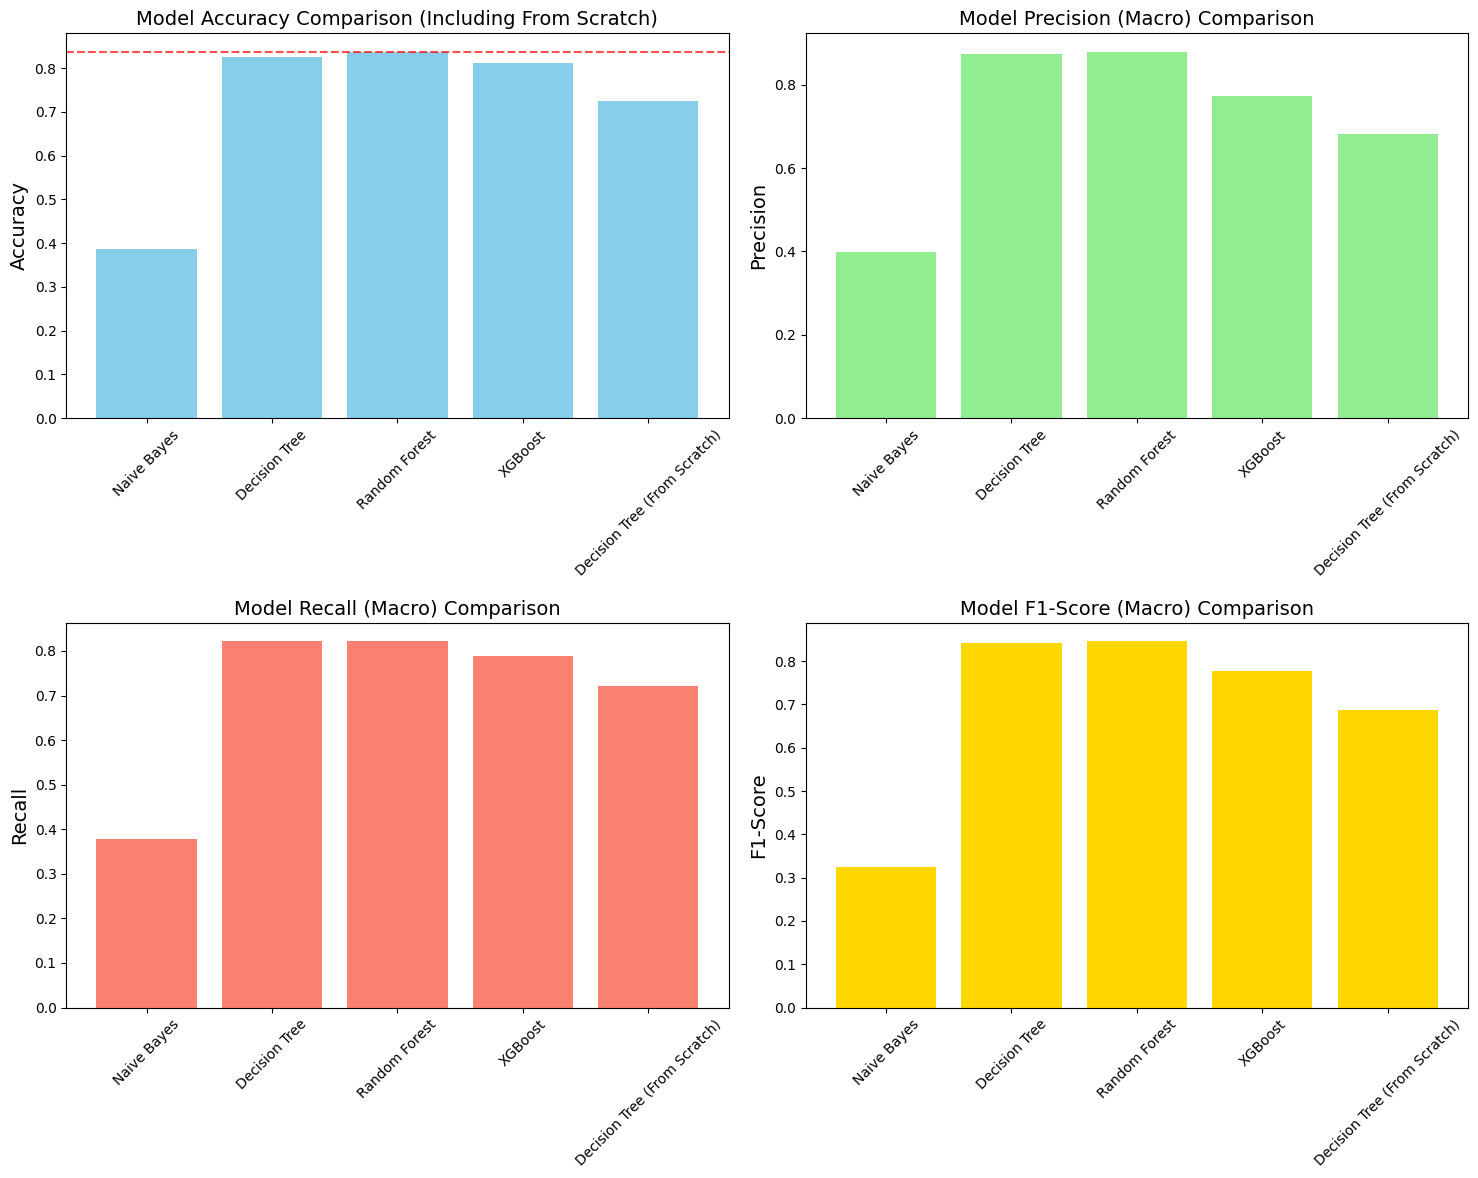

In [173]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0, 0].bar(final_results['Model'], final_results['Accuracy'], color='skyblue')
axes[0, 0].set_title('Model Accuracy Comparison (Including From Scratch)')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].axhline(y=best_overall_accuracy, color='red', linestyle='--', alpha=0.7, label='Best')


axes[0, 1].bar(final_results['Model'], final_results['Precision_Macro'], color='lightgreen')
axes[0, 1].set_title('Model Precision (Macro) Comparison')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].tick_params(axis='x', rotation=45)

axes[1, 0].bar(final_results['Model'], final_results['Recall_Macro'], color='salmon')
axes[1, 0].set_title('Model Recall (Macro) Comparison')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].tick_params(axis='x', rotation=45)

axes[1, 1].bar(final_results['Model'], final_results['F1_Macro'], color='gold')
axes[1, 1].set_title('Model F1-Score (Macro) Comparison')
axes[1, 1].set_ylabel('F1-Score')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
save_fig("final_model_comparison_with_scratch")
plt.show()